In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
import gym
from itertools import count
import torch.nn.functional as F
from IPython import display

In [2]:
class DQN(nn.Module):

    def __init__(self):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(4, 64)
        self.fc3 = nn.Linear(64, 2)

    def forward(self, x):
        x = F.elu(self.fc1(x))
        x = self.fc3(x)
        return x

In [3]:
device = torch.device('cuda:01')

In [4]:
target_net = DQN().to(device)

In [5]:
target_net.load_state_dict(torch.load('cartpole_discrete_02_target.pt'))
target_net.eval()

DQN(
  (fc1): Linear(in_features=4, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
)

In [6]:
env = gym.make('CartPole-v0')

In [7]:
current_state = env.reset()

In [8]:
imgs = []
for i in count():
    current_state = torch.FloatTensor(current_state).to(device)[None, :]
    
    # get an action from Q
    next_action = torch.argmax(target_net(current_state).squeeze()).item()
    
    # make a step
    obs, rew, done, _ = env.step(next_action)#env.step(np.random.randint(0,2))# env.step(next_action)
    current_state = obs
    
    # render images
    im = env.render(mode='rgb_array')
    imgs.append(im)
    if done:
        break

NoSuchDisplayException: Cannot connect to "None"

In [25]:
env.close()

In [26]:
# for im in imgs:
#     plt.imshow(im)
#     display.display(plt.gcf()) 
#     display.clear_output(wait=True)
#     plt.pause(0.02)

In [27]:
from matplotlib import animation

Text(0.5, 1.0, 'reward: 28')

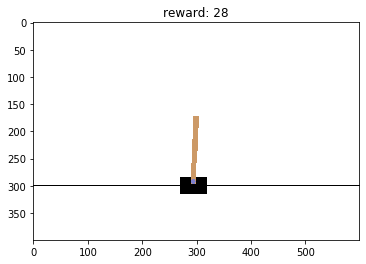

In [28]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
im_ax = ax.imshow(imgs[0])
ax.set_title('reward: '+ str(len(imgs)))

In [29]:
# initialization function: plot the background of each frame
def init():
    im_ax.set_array(imgs[0])
    return [im_ax]

# animation function.  This is called sequentially
def animate(i):
    im_ax.set_array(imgs[i])
    return [im_ax]

In [30]:
anim = animation.FuncAnimation(fig, animate, init_func=init, blit=True, frames=len(imgs), interval=1)
FFwriter = animation.FFMpegWriter(fps=30, bitrate=2000)
anim.save('discrete_failure.mp4', writer = FFwriter)# extra_args=['-vcodec', 'libx264'])